In [1]:
#Importing necessary libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.shape

(891, 12)

In [6]:
# Percentage of missing values in cabin column
687*100/891

77.10437710437711

### Exploratory data analysis

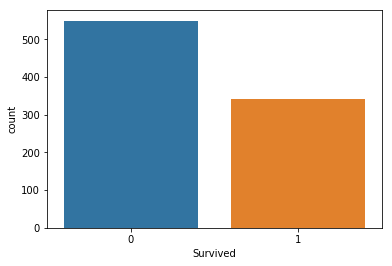

In [7]:
sns.countplot(x='Survived',data=train)
plt.show()

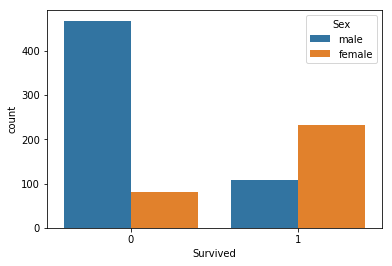

In [8]:
### Gender vs Survival rate
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

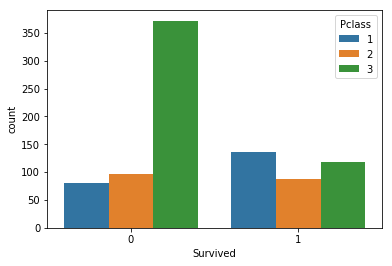

In [9]:
### Pclass vs Survival rate
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

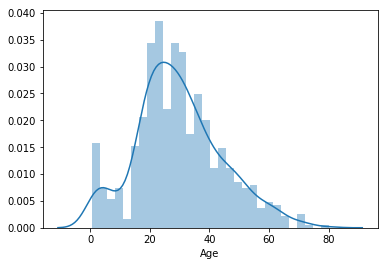

In [10]:
### Age Distribution
sns.distplot(train['Age'].dropna(),kde=True,bins=30)
plt.show()

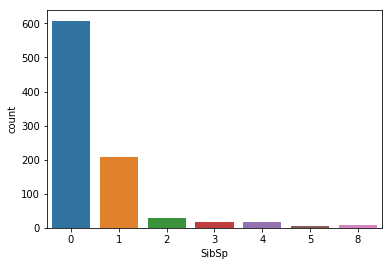

In [11]:
### Number of siblings/Spouses aboard the titanic
sns.countplot(x='SibSp',data=train)
plt.show()

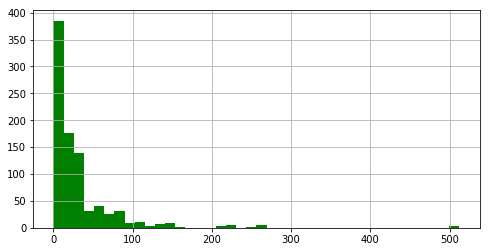

In [12]:
### Passenger Fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

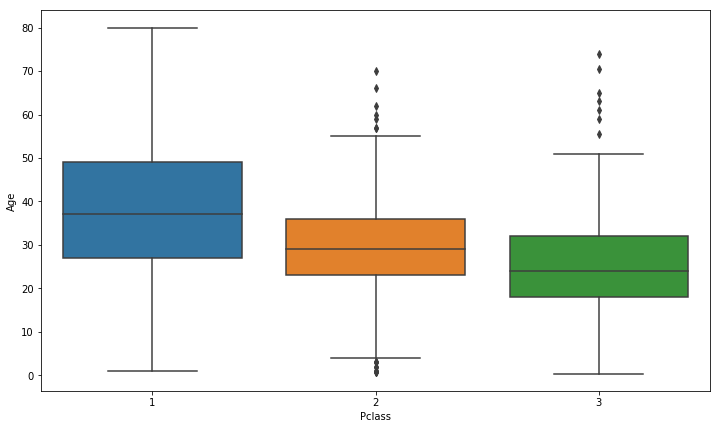

In [13]:
#Age vs Passenger class distribution
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

### Data Cleaning

In [14]:
# Function to fill the missing values of Age column
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age   
    

In [15]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
# Filling missing values of embarked column with mode
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [21]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [25]:
# Dropping un-necessary columns
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [26]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
#Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

### Building a logistic regression model

In [28]:
# Using sklearn library
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Srinivas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Fitting the logistic regression using stats model

In [29]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.2766
Time:                        07:14:32   Log-Likelihood:                -296.00
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 2.982e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0497      0.101      0.490      0.624      -0.149       0.249
Age            0.0044      0.

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
# Finding the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7873134328358209

### Model Evaluation

- We have to check Precision, Recall and F1-Score using classification report
- We can see the confusion matrix
- We can plot AUC-ROC Curve

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [33]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[135,  19],
       [ 38,  76]], dtype=int64)

In [34]:
(135+76)/(135+19+38+76)

0.7873134328358209

### AUC-ROC Curve

In [35]:
prob = logmodel.predict_proba(X_test)

In [36]:
prob

array([[0.68971389, 0.31028611],
       [0.02237103, 0.97762897],
       [0.47941282, 0.52058718],
       [0.82253384, 0.17746616],
       [0.79136344, 0.20863656],
       [0.94965233, 0.05034767],
       [0.60941442, 0.39058558],
       [0.89250771, 0.10749229],
       [0.12460394, 0.87539606],
       [0.37173008, 0.62826992],
       [0.79136344, 0.20863656],
       [0.92595154, 0.07404846],
       [0.28527286, 0.71472714],
       [0.90037852, 0.09962148],
       [0.90079819, 0.09920181],
       [0.95129833, 0.04870167],
       [0.40615261, 0.59384739],
       [0.87089177, 0.12910823],
       [0.85803903, 0.14196097],
       [0.21671613, 0.78328387],
       [0.93391853, 0.06608147],
       [0.94631064, 0.05368936],
       [0.31134266, 0.68865734],
       [0.36399038, 0.63600962],
       [0.95836803, 0.04163197],
       [0.80221614, 0.19778386],
       [0.86596857, 0.13403143],
       [0.759735  , 0.240265  ],
       [0.90321161, 0.09678839],
       [0.94821433, 0.05178567],
       [0.

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,prob[:,1],drop_intermediate=False)

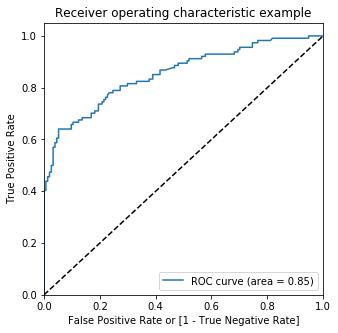

In [39]:
draw_roc(y_test,prob[:,1])

In [40]:
prob[:,1]

array([0.31028611, 0.97762897, 0.52058718, 0.17746616, 0.20863656,
       0.05034767, 0.39058558, 0.10749229, 0.87539606, 0.62826992,
       0.20863656, 0.07404846, 0.71472714, 0.09962148, 0.09920181,
       0.04870167, 0.59384739, 0.12910823, 0.14196097, 0.78328387,
       0.06608147, 0.05368936, 0.68865734, 0.63600962, 0.04163197,
       0.19778386, 0.13403143, 0.240265  , 0.09678839, 0.05178567,
       0.80183615, 0.850214  , 0.68866765, 0.08792754, 0.09984505,
       0.95041178, 0.07967435, 0.04665755, 0.1074528 , 0.43898473,
       0.70678498, 0.62826992, 0.88662374, 0.34179098, 0.15541594,
       0.39104363, 0.04926145, 0.31307001, 0.06356281, 0.20863656,
       0.79513133, 0.26117631, 0.74444824, 0.66196796, 0.68866765,
       0.09984027, 0.14867759, 0.12844448, 0.3002254 , 0.93628082,
       0.93214488, 0.11787362, 0.03530831, 0.59114251, 0.05226147,
       0.25381999, 0.8410943 , 0.57275411, 0.610892  , 0.38685971,
       0.58628408, 0.13860628, 0.13378602, 0.11976238, 0.54172

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [42]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
dtc_predictions = dtc.predict(X_test)

In [44]:
# Finding the accuray of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dtc_predictions)

0.7611940298507462

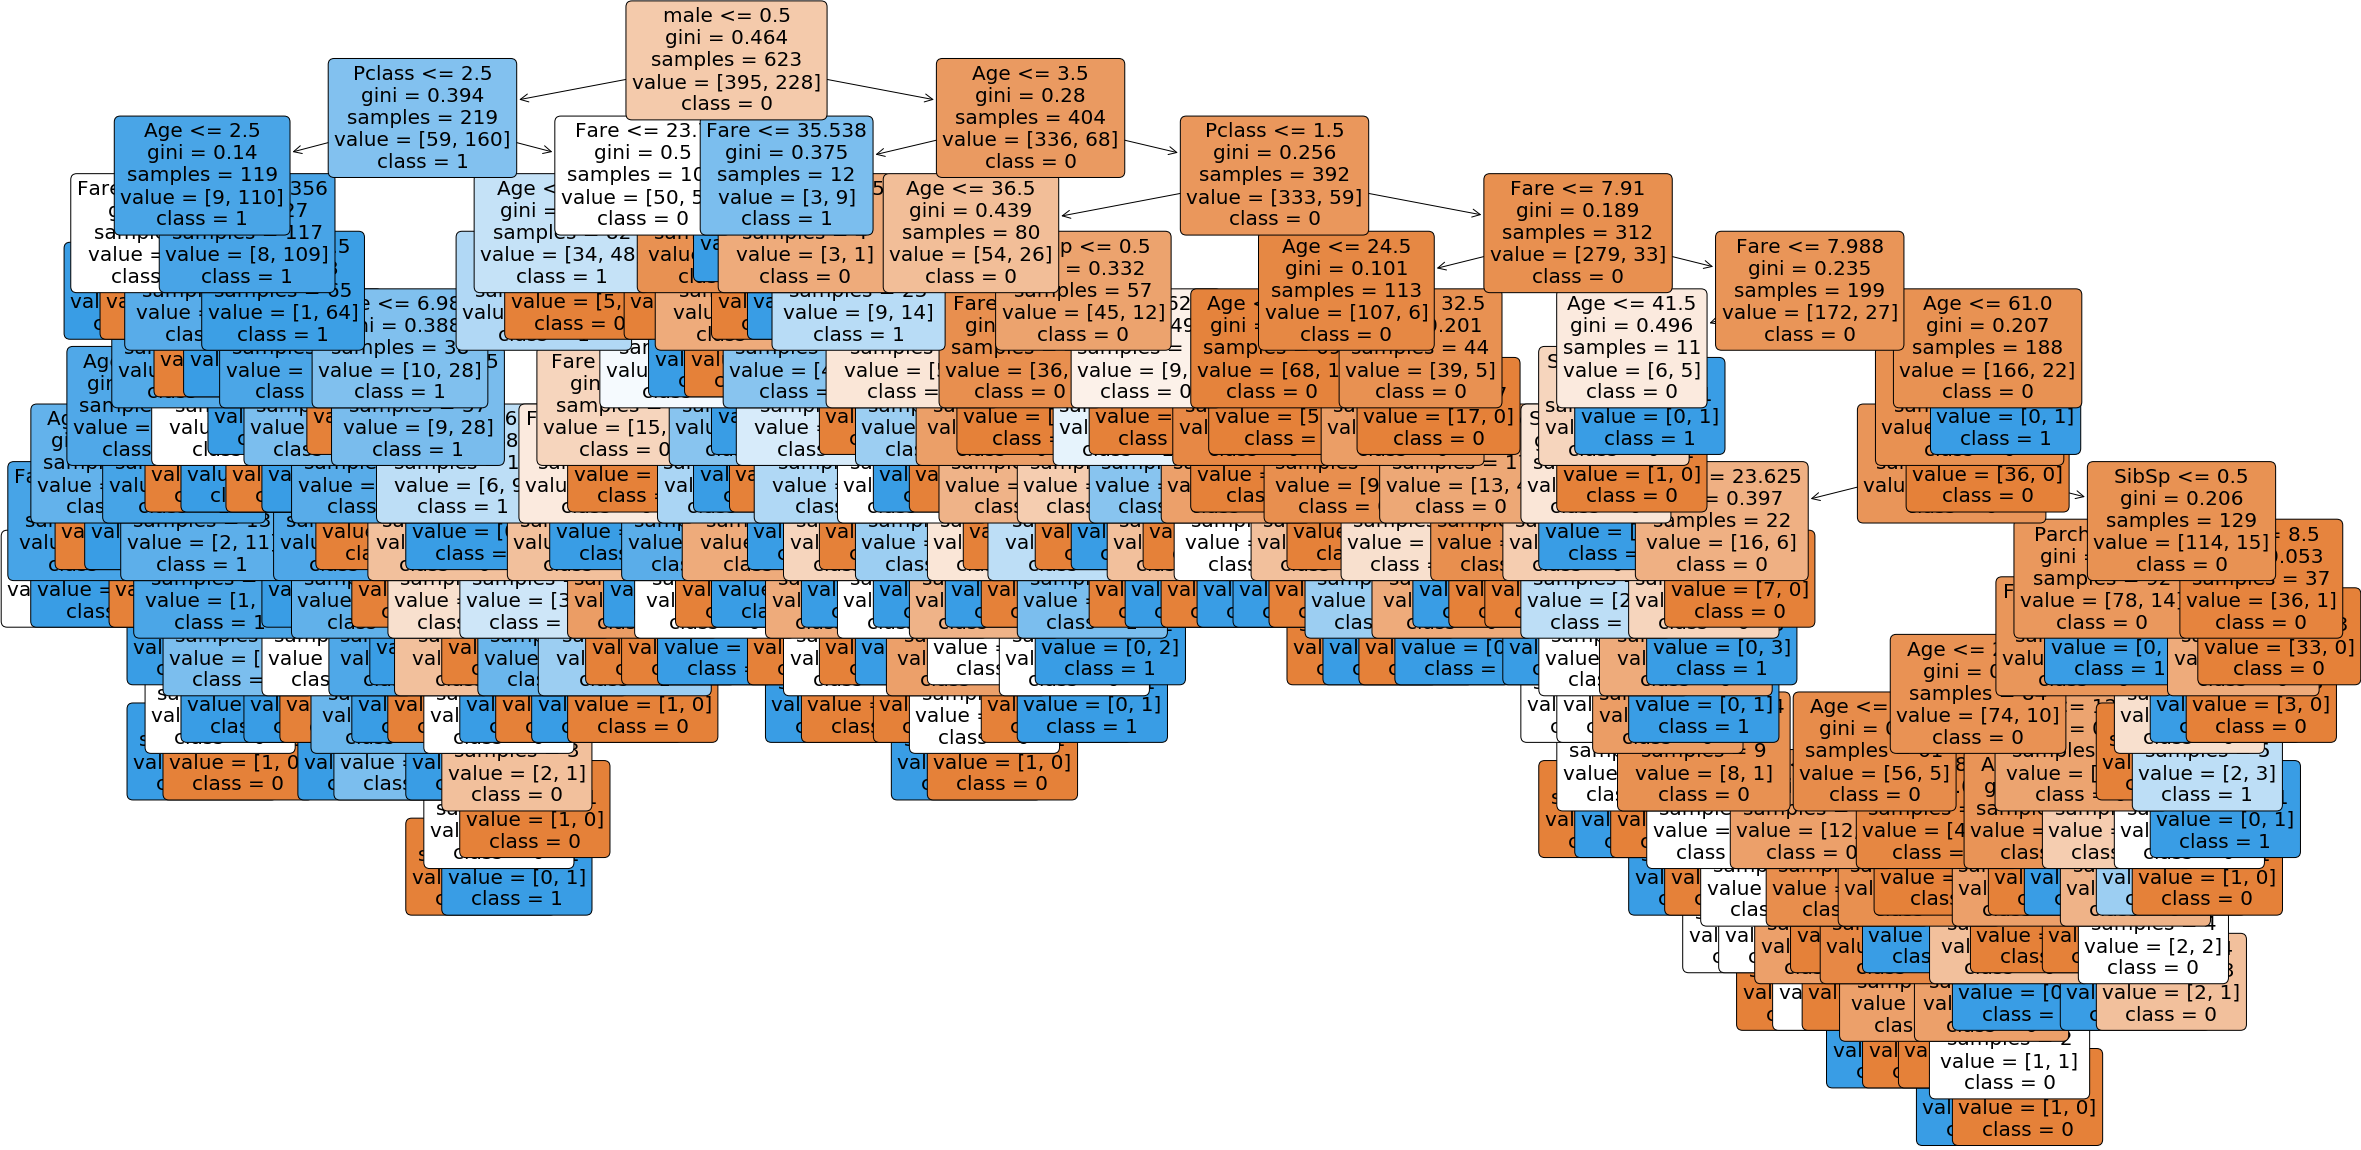

In [45]:
# Plotting decision Tree
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(dtc,feature_names=X_train.columns,filled=True,fontsize=20,rounded=True,class_names=['0','1'])
plt.show()

In [46]:
# Finding the important features
dtc.feature_importances_

array([0.09861517, 0.25604294, 0.03128838, 0.03792963, 0.22835412,
       0.32307269, 0.00479702, 0.01990004])

In [47]:
list(zip(dtc.feature_importances_,X_train.columns))

[(0.09861517194391872, 'Pclass'),
 (0.2560429425155758, 'Age'),
 (0.031288382268842035, 'SibSp'),
 (0.03792963144032589, 'Parch'),
 (0.22835412052037526, 'Fare'),
 (0.3230726900198919, 'male'),
 (0.004797017071567375, 'Q'),
 (0.019900044219503005, 'S')]

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [49]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
rfc_predictions = rfc.predict(X_test)

# Finding the accuray of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc_predictions)

0.7985074626865671

In [52]:
list(zip(rfc.feature_importances_,X_train.columns))

[(0.08226531390804179, 'Pclass'),
 (0.25652755478266365, 'Age'),
 (0.05483517172307364, 'SibSp'),
 (0.043854555064489605, 'Parch'),
 (0.26567513200024, 'Fare'),
 (0.2595371351478147, 'male'),
 (0.011788582279622354, 'Q'),
 (0.025516555094054268, 'S')]

# Grid Search Cv

In [53]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Decision Tree
def dtree_grid_search(X,y,nfolds):
    # create a dictionary of all the values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(3,20)}
    #decision tree model 
    dtree_model = DecisionTreeClassifier()
    #Use grid search to test all values
    dtree_gscv = GridSearchCV(dtree_model,param_grid,cv=nfolds)
    #fit the model
    dtree_gscv.fit(X,y)
    return dtree_gscv.best_params_

In [54]:
dtree_grid_search(X_train,y_train,10)

{'criterion': 'gini', 'max_depth': 4}

In [55]:
# Grid Search for Random Forest
def rforest_grid_search(X,y,nfolds):
    # create a dictionary of all the values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(3,20),'n_estimators':[50,100,200]}
    #Randomforest  model 
    rforest_model = RandomForestClassifier()
    #Use grid search to test all values
    rforest_gscv = GridSearchCV(rforest_model,param_grid,cv=nfolds)
    #fit the model
    rforest_gscv.fit(X,y)
    return rforest_gscv.best_params_

In [56]:
rforest_grid_search(X_train,y_train,10)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}

### Similarly we can implement RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomSearchCV